# Hypothesis Testing

## 1 Sample T-Testing

Let's imagine the fictional business BuyPie, which sends ingredients for pies to your household, so that you can make them from scratch. Suppose that a product manager wants the average age of visitors to BuyPie.com to be 30. In the past hour, the website had 100 visitors and the average age was 31. Are the visitors too old? Or is this just the result of chance and a small sample size?

We can test this using a univariate T-test. A univariate T-test compares a sample mean to a hypothetical population mean. It answers the question "What is the probability that the sample came from a distribution with the desired mean?"

When we conduct a hypothesis test, we want to first create a null hypothesis, which is a prediction that there is no significant difference. The null hypothesis that this test examines can be phrased as such: "The set of samples belongs to a population with the target mean".

The result of the 1 Sample T Test is a p-value, which will tell us whether or not we can reject this null hypothesis. Generally, if we receive a p-value of less than 0.05, we can reject the null hypothesis and state that there is a significant difference.

SciPy has a function called ttest_1samp, which performs a 1 Sample T-Test for you.

ttest_1samp requires two inputs, a distribution of values and an expected mean:

tstat, pval = ttest_1samp(example_distribution, expected_mean)
print pval

It also returns two outputs: the t-statistic (which we won't cover in this course), and the p-value — telling us how confident we can be that the sample of values came from a distribution with the mean specified.

We have provided a small dataset called ages, representing the ages of customers to BuyPie.com in the past hour.

First, print out ages to the console and examine the numbers.

Even with a small dataset like this, it is hard to make judgments from just looking at the numbers.

To understand the data better, let's look at the mean. Calculate the mean of ages using np.mean. Store it in a variable called ages_mean and print it out.

Use ttest_1samp with ages to see what p-value the experiment returns for this distribution, where we expect the mean to be 30.

Store the p-value in a variable called pval. Remember that it is the second output of the ttest_1samp function. We don't use the first output, the t-statistic, so you can store it in a variable with whatever name you'd like.

Print out pval to the console. Does the p-value you got with the 1 Sample T-Test make sense, knowing the mean of ages?

In [1]:
from scipy.stats import ttest_1samp
import numpy as np

ages = np.array([ 32,  34,  29,  29,  22,  39,  38,  37,  38,  36,  30,  26,  22,  22])
print(ages)

ages_mean = np.mean(ages)
print(ages_mean)

tstat, pval = ttest_1samp(ages, 30)
print(pval)

[32 34 29 29 22 39 38 37 38 36 30 26 22 22]
31.0
0.5605155888171379


In the last exercise, we got a p-value that was much higher than 0.05, so we cannot reject the null hypothesis. Does this mean that if we wait for more visitors to BuyPie, the average age would definitely be 30 and not 31? Not necessarily. In fact, in this case, we know that the mean of our sample was 31.

P-values give us an idea of how confident we can be in a result. Just because we don’t have enough data to detect a difference doesn’t mean that there isn’t one. Generally, the more samples we have, the smaller a difference we’ll be able to detect. You can learn more about the exact relationship between the number of samples and detectable differences in the Sample Size Determination course.

To gain some intuition on how our confidence levels can change, let's explore some distributions with different means and how our p-values from the 1 Sample T-Tests change.

We have loaded a dataset daily_visitors into the editor that represents the ages of visitors to BuyPie.com in the last 1000 days. Each entry daily_visitors[i] is an array of entries representing the age per visitor to the website on day i.

We predicted that the average age would be 30, and we want to know if the actual data differs from that.

We have made a for loop that goes through the 1000 inner lists. Inside this loop, perform a 1 Sample T-Test with each day of data (daily_visitors[i]). For now, just print out the p-value from each test.

If we get a pval < 0.05, we can conclude that it is unlikely that our sample has a true mean of 30. Thus, the hypothesis test has correctly rejected the null hypothesis, and we call that a correct result.

Every time we get a correct result within the 1000 experiments, add 1 to correct_results.

In [2]:
correct_results = 0 # Start the counter at 0

daily_visitors = np.genfromtxt("daily_visitors.csv", delimiter=",")


In [6]:
daily_visitors.shape

np.mean(daily_visitors,axis=1)

31.00082

In [8]:

for i in range(1000): # 1000 experiments
   #your ttest here:
    t, pval = ttest_1samp(daily_visitors[i], 30) # perform t-test
    if pval < 0.05: # check our p-value
        correct_results += 1
    #print the pvalue here:
    print(pval)
print("We correctly recognized that the distribution was different in " + str(correct_results) + " out of 1000 experiments.")

0.23695942473632142
0.005511750046377255
0.23636795865412213
0.10783517811607937
0.004414882120780694
0.16214048205543172
0.1600829236665709
0.008752908031478393
0.009413759844110177
0.28829862847381077
0.035310467589078576
0.2144769257585793
0.0006227718256323399
9.588258876957111e-06
0.2351509229750954
0.00026342324862845364
0.8039284954571189
0.030165739305163603
0.6706988618319033
0.08734286055124148
2.907880833989432e-05
0.02649255683160421
0.04467245164993898
0.13544331926124387
0.016612898432082093
0.14892019305948018
0.037645152288740394
0.015376369766211437
0.15679877794158653
0.15065054103948747
0.0685476997160581
0.14946579127226753
0.00035270120578793457
0.011641901238399317
0.7993493159918439
0.01625350692456645
0.0271314568134415
0.04835788738829874
0.11758287850526042
0.8801423342575648
0.05547696429556022
0.005089847690879995
0.006679724618281934
0.12478644532611288
0.00373992490997133
0.0016715530036133515
0.0012944771181846912
0.153507674004558
0.7798467721041478
0.00

0.13247317615441326
0.24319061237227685
0.3181870389698565
0.030855154745303433
0.017158339463717177
0.0035448392575030928
0.0006295821713657631
0.01404700365518679
0.01731313427959406
0.0003193460314599023
0.000641872680652316
0.11778648817299306
0.024613411631637813
0.08101514124785011
0.0028801862401371704
0.0008468147787030149
0.249831853694697
0.07617944729588168
0.23195920017043778
0.04466798799496514
0.2694622736245003
0.7575592269788329
0.04789708089816328
0.030062180861750318
0.0822750325881097
0.13940847177552915
0.0010839890711375271
0.015586268581441458
0.02040612241578585
0.0675813719930734
0.008847414039087764
0.9707376281247637
0.07795892064211805
0.0013187690349869777
0.4501686382933525
0.007337396615744979
0.364168672353419
0.001715137152932233
0.006324684047292254
0.0015407060415340912
0.03857306413680236
0.46937366920902124
0.00012500200939840838
0.023890616725610093
0.18544953833289293
0.014474765335674267
0.8897711187306735
0.039388465447067283
0.000692576647148914

## 2 Sample T-Test

Suppose that last week, the average amount of time spent per visitor to a website was 25 minutes. This week, the average amount of time spent per visitor to a website was 28 minutes. Did the average time spent per visitor change? Or is this part of natural fluctuations?

One way of testing whether this difference is significant is by using a 2 Sample T-Test. A 2 Sample T-Test compares two sets of data, which are both approximately normally distributed.

The null hypothesis, in this case, is that the two distributions have the same mean.

We can use SciPy's ttest_ind function to perform a 2 Sample T-Test. It takes the two distributions as inputs and returns the t-statistic (which we don't use), and a p-value. If you can't remember what a p-value is, refer to the earlier exercise on univariate t-tests.

## Dangers of Multiple T-Tests

Suppose that we own a chain of stores that sell ants, called VeryAnts. There are three different locations: A, B, and C. We want to know if the average ant sales over the past year are significantly different between the three locations.

At first, it seems that we could perform T-tests between each pair of stores.

We know that the p-value is the probability that we incorrectly reject the null hypothesis on each t-test. The more t-tests we perform, the more likely that we are to get a false positive, a Type I error.

For a p-value of 0.05, if the null hypothesis is true then the probability of obtaining a significant result is 1 – 0.05 = 0.95. When we run another t-test, the probability of still getting a correct result is 0.95 * 0.95, or 0.9025. That means our probability of making an error is now close to 10%! This error probability only gets bigger with the more t-tests we do.

We have created samples a, b, and c, representing the sales at VeryAnts at locations A, B, and C, respectively. We want to see if there's a significant difference in sales between the three locations.

Explore datasets a, b, and c by finding and printing the means and standard deviations of each one. Store the means in variables called a_mean, b_mean, and c_mean. Store the standard deviations in variables called a_std, b_std, and c_std.

In [18]:
a = np.genfromtxt("store_a2.csv",  delimiter=",")
b = np.genfromtxt("store_b2.csv",  delimiter=",")
c = np.genfromtxt("store_c2.csv",  delimiter=",")

a_mean = np.mean(a)
b_mean = np.mean(b)
c_mean = np.mean(c)
a_std = np.std(a)
b_std = np.std(b)
c_std = np.std(c)
print(a_mean, b_mean, c_mean)
print(a_std, b_std, c_std)

58.34963608404818 65.62628713559894 62.36117318586781
14.753704052338916 14.746564490246481 15.092458510897417


In [19]:
from scipy.stats import ttest_ind

t, a_b_pval = ttest_ind(a, b)
t, a_c_pval = ttest_ind(a, c)
t, b_c_pval = ttest_ind(b, c)

error_prob = 1-0.95**3

Perform a 2-Sample T-test between each pair of location data.

Store the p-values in variables called a_b_pval, a_c_pval, and b_c_pval. Print them to the console.

Store the probability of error in a variable called error_prob. Print it out to the console.

In [20]:
print(a_b_pval, a_c_pval,b_c_pval)

2.7667629398748514e-05 0.021012051698577176 0.059885635239664836


In [21]:
a = np.genfromtxt("1.csv",  delimiter=",")
b = np.genfromtxt("2.csv",  delimiter=",")
c = np.genfromtxt("3.csv",  delimiter=",")

a_mean = np.mean(a)
b_mean = np.mean(b)
c_mean = np.mean(c)
a_std = np.std(a)
b_std = np.std(b)
c_std = np.std(c)
print(a_mean, b_mean, c_mean)
print(a_std, b_std, c_std)

-0.004863953187566665 18.13547678570649 9.474594393243935
0.5179727591484155 2.9323758820162595 5.043454387901947


In [22]:
from scipy.stats import ttest_ind

t, a_b_pval = ttest_ind(a, b)
t, a_c_pval = ttest_ind(a, c)
t, b_c_pval = ttest_ind(b, c)

error_prob = 1-0.95**3

In [23]:
print(a_b_pval, a_c_pval,b_c_pval)

8.476291056606592e-130 2.882539338834781e-40 1.0138757365565411e-26


## ANOVA

In the last exercise, we saw that the probability of making a Type I error got dangerously high as we performed more t-tests.

When comparing more than two numerical datasets, the best way to preserve a Type I error probability of 0.05 is to use ANOVA. ANOVA (Analysis of Variance) tests the null hypothesis that all of the datasets have the same mean. If we reject the null hypothesis with ANOVA, we're saying that at least one of the sets has a different mean; however, it does not tell us which datasets are different.

We can use the SciPy function f_oneway to perform ANOVA on multiple datasets. It takes in each dataset as a different input and returns the t-statistic and the p-value. For example, if we were comparing scores on a videogame between math majors, writing majors, and psychology majors, we could run an ANOVA test with this line:

`fstat, pval = f_oneway(scores_mathematicians, scores_writers, scores_psychologists)`

The null hypothesis, in this case, is that all three populations have the same mean score on this videogame. If we reject this null hypothesis (if we get a p-value less than 0.05), we can say that we are reasonably confident that a pair of datasets is significantly different. After using only ANOVA, we can't make any conclusions on which two populations have a significant difference.

Let's look at an example of ANOVA in action.

Delete your three t-tests. We have a better way to do this now!

Perform an ANOVA test on a, b, and c and store the p-value in a variable called pval.

Print out your pval. Does this p-value lead you to reject the null hypothesis?

In [16]:
from scipy.stats import f_oneway

a = np.genfromtxt("store_a2.csv",  delimiter=",")
b = np.genfromtxt("store_b2.csv",  delimiter=",")
c = np.genfromtxt("store_c2.csv",  delimiter=",")

fstat, pval = f_oneway(a,b,c)
print(pval)

0.0001534116600777967


## Assumptions of Numerical Hypothesis Tests

Before we use numerical hypothesis tests, we need to be sure that the following things are true:

### 1. The samples should each be normally distributed...ish

Data analysts in the real world often still perform hypothesis on sets that aren't exactly normally distributed. What is more important is to recognize if there is some reason to believe that a normal distribution is especially unlikely. If your dataset is definitively not normal, the numerical hypothesis tests won't work as intended.

For example, imagine we have three datasets, each representing a day of traffic data in three different cities. Each dataset is independent, as traffic in one city should not impact traffic in another city. However, it is unlikely that each dataset is normally distributed. In fact, each dataset probably has two distinct peaks, one at the morning rush hour and one during the evening rush hour. The histogram of a day of traffic data might look something like this:

![](histogram_data_traffic.svg)

In this scenario, using a numerical hypothesis test would be inappropriate.

### 2. The population standard deviations of the groups should be equal

For ANOVA and 2-Sample T-Tests, using datasets with standard deviations that are significantly different from each other will often obscure the differences in group means.

To check for similarity between the standard deviations, it is normally sufficient to divide the two standard deviations and see if the ratio is "close enough" to 1. "Close enough" may differ in different contexts but generally staying within 10% should suffice.

### 3. The samples must be independent

When comparing two or more datasets, the values in one distribution should not affect the values in another distribution. In other words, knowing more about one distribution should not give you any information about any other distribution.

Here are some examples where it would seem the samples are not independent:

* the number of goals scored per soccer player before, during, and after undergoing a rigorous training regimen
* a group of patients' blood pressure levels before, during, and after the administration of a drug

It is important to understand your datasets before you begin conducting hypothesis tests on it so that you know you are choosing the right test.

Use Matplotlib's plt.hist function to display dist_1 before the call to plt.show. Does it look like this distribution is normal?

Now, display histograms for dist_2, dist_3, and dist_4. Which of these distributions would probably not be a good choice to use in an ANOVA comparison? Create a variable called not_normal and set it equal to the distribution number that would be least suited to be used in an ANOVA test.

Calculate the ratio of standard deviations between dist_2 and dist_3 and store it in a variable called ratio. Print it to the console. Is this "close enough" to perform a numerical hypothesis test between the two datasets?

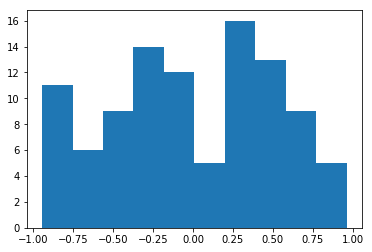

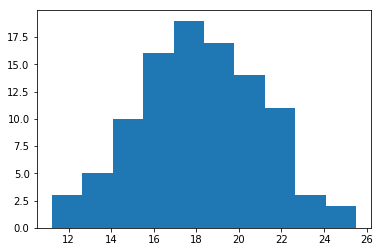

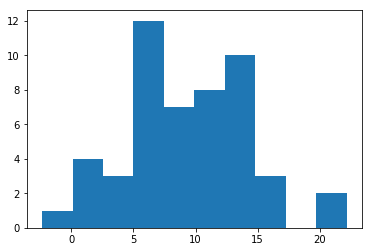

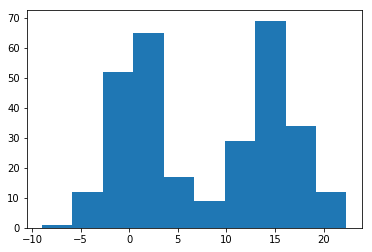

0.5814221080397466


In [18]:
import matplotlib.pyplot as plt

dist_1 = np.genfromtxt("1.csv",  delimiter=",")
dist_2 = np.genfromtxt("2.csv",  delimiter=",")
dist_3 = np.genfromtxt("3.csv",  delimiter=",")
dist_4 = np.genfromtxt("4.csv",  delimiter=",")

#plot your histogram here
plt.subplot()
plt.hist(dist_1)
plt.show()

plt.hist(dist_2)
plt.show()

plt.hist(dist_3)
plt.show()

plt.hist(dist_4)
plt.show()

not_normal = 4
ratio = np.std(dist_2) / np.std(dist_3)
print(ratio)

## Tukey's Range Test

Let's say that we have performed ANOVA to compare three sets of data from the three VeryAnts stores. We received the result that there is some significant difference between datasets.

Now, we have to find out which datasets are different.

We can perform a Tukey's Range Test to determine the difference between datasets.

If we feed in three datasets, such as the sales at the VeryAnts store locations A, B, and C, Tukey's Test can tell us which pairs of locations are distinguishable from each other.

The function to perform Tukey's Range Test is pairwise_tukeyhsd, which is found in statsmodel, not scipy. We have to provide the function with one list of all of the data and a list of labels that tell the function which elements of the list are from which set. We also provide the significance level we want, which is usually 0.05.

For example, if we were looking to compare mean scores of movies that are dramas, comedies, or documentaries, we would make a call to pairwise_tukeyhsd like this:

```
movie_scores = np.concatenate([drama_scores, comedy_scores, documentary_scores])
labels = ['drama'] * len(drama_scores) + ['comedy'] * len(comedy_scores) + ['documentary'] * len(documentary_scores)

tukey_results = pairwise_tukeyhsd(movie_scores, labels, 0.05)
```

It will return a table of information, telling you whether or not to reject the null hypothesis for each pair of datasets.


In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

a = np.genfromtxt("store_a2.csv",  delimiter=",")
b = np.genfromtxt("store_b2.csv",  delimiter=",")
c = np.genfromtxt("store_c2.csv",  delimiter=",")

stat, pval = f_oneway(a, b, c)
print(pval)

# Using our data from ANOVA, we create v and l
v = np.concatenate([a, b, c])
labels = ['a'] * len(a) + ['b'] * len(b) + ['c'] * len(c)

tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

ModuleNotFoundError: No module named 'statsmodels'

## Binomial Test

Let's imagine that we are analyzing the percentage of customers who make a purchase after visiting a website. We have a set of 1000 customers from this month, 58 of whom made a purchase. Over the past year, the number of visitors per every 1000 who make a purchase hovers consistently at around 72. Thus, our marketing department has set our target number of purchases per 1000 visits to be 72. We would like to know if this month's number, 58, is a significant difference from that target or a result of natural fluctuations.

How do we begin comparing this, if there's no mean or standard deviation that we can use? The data is divided into two discrete categories, "made a purchase" and "did not make a purchase".

So far, we have been working with numerical datasets. The tests we have looked at, the 1- and 2-Sample T-Tests, ANOVA, and Tukey's Range test, will not work if we can't find the means of our distributions and compare them.

If we have a dataset where the entries are not numbers, but categories instead, we have to use different methods.

To analyze a dataset like this, with two different possibilities for entries, we can use a Binomial Test. A Binomial Test compares a categorical dataset to some expectation.

Examples include:

* Comparing the actual percent of emails that were opened to the quarterly goals
* Comparing the actual percentage of respondents who gave a certain survey response to the expected survey response
* Comparing the actual number of heads from 1000 coin flips of a weighted coin to the expected number of heads

The null hypothesis, in this case, would be that there is no difference between the observed behavior and the expected behavior. If we get a p-value of less than 0.05, we can reject that hypothesis and determine that there is a difference between the observation and expectation.

SciPy has a function called binom_test, which performs a Binomial Test for you.

binom_test requires three inputs, the number of observed successes, the number of total trials, and an expected probability of success. For example, with 1000 coin flips of a fair coin, we would expect a "success rate" (the rate of getting heads), to be 0.5, and the number of trials to be 1000. Let's imagine we get 525 heads. Is the coin weighted? This function call would look like:

`pval = binom_test(525, n=1000, p=0.5)`

It returns a p-value, telling us how confident we can be that the sample of values was likely to occur with the specified probability. If we get a p-value less than 0.05, we can reject the null hypothesis and say that it is likely the coin is actually weighted, and that the probability of getting heads is statistically different than 0.5.

Suppose the goal of VeryAnts's marketing team this quarter was to have 6% of customers click a link that was emailed to them. They sent out a link to 10,000 customers and 510 clicked the link, which comes out to 5.1% instead of 6%. Did they do significantly worse than the target? Let's use a binomial test to answer this question.

Use SciPy's binom_test function to calculate the p-value the experiment returns for this distribution, where we wanted the mean to be 6% of emails opened, or p=0.06, but only saw 5.1% of emails opened.

Store the p-value in a variable called pval and print it out.

In [23]:
from scipy.stats import binom_test
pval = binom_test(510, n=10000, p=0.06)
print(pval)

0.00011592032724546606
0.6891529835730346


For the next quarter, marketing has tried out a new email tactic, including puns in every line of every email. As a result, 590 people out of 10000 opened the link in the newest email.

If we still wanted the mean to be 6% of emails opened, but now have 5.9% of emails opened, what is the new p-value. Save your results to the variable pval2

Does this new p-value make sense?

In [24]:
pval2 = binom_test(590, n=10000, p=0.06)
print(pval2)

0.6891529835730346


## Chi Square Test

In the last exercise, we looked at data where customers visited a website and either made a purchase or did not make a purchase. What if we also wanted to track if visitors added any items to their shopping cart? With three discrete categories of data per dataset, we can no longer use a Binomial Test. If we have two or more categorical datasets that we want to compare, we should use a Chi Square test. It is useful in situations like:

* An A/B test where half of users were shown a green submit button and the other half were shown a purple submit button. Was one group more likely to click the submit button?
* Men and women were both given a survey asking "Which of the following three products is your favorite?" Did the men and women have significantly different preferences?

In SciPy, you can use the function chi2_contingency to perform a Chi Square test.

The input to chi2_contingency is a contingency table where:

* The columns are each a different condition, such as men vs. women or Interface A vs. Interface B
* The rows represent different outcomes, like "Survey Response A" vs. "Survey Response B" or "Clicked a Link" vs. "Didn't Click"

This table can have as many rows and columns as you need.

In this case, the null hypothesis is that there's no significant difference between the datasets. We reject that hypothesis, and state that there is a significant difference between two of the datasets if we get a p-value less than 0.05.

The management at the VeryAnts ant store wants to know if their two most popular species of ants, the Leaf Cutter and the Harvester, vary in popularity between 1st, 2nd, and 3rd graders.

We have created a table representing the different ants bought by the children in grades 1, 2, and 3 after the last big field trip to VeryAnts. Run the code to see what happens when we enter this table into SciPy's chi-square test.

Does the resulting p-value mean that we should reject or accept the null hypothesis?

In [26]:
from scipy.stats import chi2_contingency
# Contingency table
#         harvester |  leaf cutter
# ----+------------------+------------
# 1st gr | 30       |  10
# 2nd gr | 35       |  5
# 3rd gr | 28       |  12

X = [[30, 10],
     [35, 5],
     [28, 12]]
chi2, pval, dof, expected = chi2_contingency(X)
print(pval)

0.15508230807673704


A class of 40 4th graders comes into VeryAnts in the next week and buys 20 sets of Leaf Cutter ants and 20 sets of Harvester ants.

Add this data to the contingency table, rerun the chi-square test, and see if there is now a low enough value to reject the null hypothesis.

In [27]:
X = [[30, 10],
     [35, 5],
     [28, 12],
     [20, 20]]
chi2, pval, dof, expected = chi2_contingency(X)
print(pval)

0.002812834559546625
